<a href="https://colab.research.google.com/github/robingenz/htwg-machine-learning-exercises/blob/main/exercises/01_Explorative_Analyse_und_PCA/01-explorative-analyse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Datenvorverarbeitung mit Pandas: Food Nutrient Database

## Setup

### Einbinden von Paketen

Häufig verwendete Pakete einbinden.

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline

np.__version__, pd.__version__

('1.23.4', '1.5.0')

In [2]:
%version_information

UsageError: Line magic function `%version_information` not found.


### Einlesen der Daten

In [3]:
import os
import wget
if not os.path.isfile('data/foods-2011-10-03.json.zip'):
    print("Downloading file...\n")
    wget.download('', 'data/foods-2011-10-03.json.zip')
else:
    print("File exists\n")
!ls -11

File exists

01_explorative-analyse.ipynb
02_data-preprocessing.ipynb
_exercise-sheet.ipynb
data


In [4]:
import zipfile
import json
with zipfile.ZipFile('data/foods-2011-10-03.json.zip') as file:
    with file.open('foods-2011-10-03.json') as jsonFile:
        jsonData = json.load(jsonFile)

In [5]:
# Print the type of data variable
print("Type of `data`:", type(jsonData))
print("Type of `data[0]`:", type(jsonData[0]))
print(jsonData[0].keys())
print(jsonData[0]['nutrients'][0])

Type of `data`: <class 'list'>
Type of `data[0]`: <class 'dict'>
dict_keys(['id', 'description', 'tags', 'manufacturer', 'group', 'portions', 'nutrients'])
{'value': 25.18, 'units': 'g', 'description': 'Protein', 'group': 'Composition'}


## Aufbereitung

In [6]:
def transformFood(food):
    return { 'description': food['description'], 'group': food['group'], 'id': food['id'], 'manufacturer': food['manufacturer'] }
  
transformedData = map(transformFood, jsonData)
foodDataFrame = pd.DataFrame(data=transformedData)

foodDataFrame.head()

,description,group,id,manufacturer
0,"Cheese, caraway",Dairy and Egg Products,1008,
1,"Cheese, cheddar",Dairy and Egg Products,1009,
2,"Cheese, edam",Dairy and Egg Products,1018,
3,"Cheese, feta",Dairy and Egg Products,1019,
4,"Cheese, mozzarella, part skim milk",Dairy and Egg Products,1028,


In [7]:
def transformNutrients(jsonData):
  dataFrame = pd.DataFrame(jsonData['nutrients'])
  dataFrame["id"]=jsonData['id']
  return dataFrame

transformedData = map(transformNutrients, jsonData)
nutrientDataFrames = list(transformedData)

print(len(nutrientDataFrames), 'entries')
nutrientDataFrames[0].head()

6636 entries


,value,units,description,group,id
0,25.18,g,Protein,Composition,1008
1,29.20,g,Total lipid (fat),Composition,1008
2,3.06,g,"Carbohydrate, by difference",Composition,1008
3,3.28,g,Ash,Other,1008
4,376.00,kcal,Energy,Energy,1008


In [8]:
nutrientDataFrame = pd.concat(nutrientDataFrames)
nutrientDataFrame.head()

,value,units,description,group,id
0,25.18,g,Protein,Composition,1008
1,29.20,g,Total lipid (fat),Composition,1008
2,3.06,g,"Carbohydrate, by difference",Composition,1008
3,3.28,g,Ash,Other,1008
4,376.00,kcal,Energy,Energy,1008


In [9]:
lenBeforeDrop = len(nutrientDataFrame)
nutrientDataFrame.drop_duplicates(inplace=True)
lenAfterDrop = len(nutrientDataFrame)
print(lenBeforeDrop - lenAfterDrop, 'duplicates dropped')
nutrientDataFrame.head()


14179 duplicates dropped


,value,units,description,group,id
0,25.18,g,Protein,Composition,1008
1,29.20,g,Total lipid (fat),Composition,1008
2,3.06,g,"Carbohydrate, by difference",Composition,1008
3,3.28,g,Ash,Other,1008
4,376.00,kcal,Energy,Energy,1008


In [10]:
nutrientDataFrame.rename(mapper={"description":"nu_desc", "group":"nu_group"}, axis='columns', inplace=True)
nutrientDataFrame.head()

,value,units,nu_desc,nu_group,id
0,25.18,g,Protein,Composition,1008
1,29.20,g,Total lipid (fat),Composition,1008
2,3.06,g,"Carbohydrate, by difference",Composition,1008
3,3.28,g,Ash,Other,1008
4,376.00,kcal,Energy,Energy,1008


In [11]:
foodDataFrame.rename(mapper={"description":"f_desc", "group":"f_group"}, axis='columns', inplace=True)
foodDataFrame.head()

,f_desc,f_group,id,manufacturer
0,"Cheese, caraway",Dairy and Egg Products,1008,
1,"Cheese, cheddar",Dairy and Egg Products,1009,
2,"Cheese, edam",Dairy and Egg Products,1018,
3,"Cheese, feta",Dairy and Egg Products,1019,
4,"Cheese, mozzarella, part skim milk",Dairy and Egg Products,1028,


In [12]:
dataFrame = pd.merge(nutrientDataFrame, foodDataFrame, how="outer", on="id")
dataFrame.head()

,value,units,nu_desc,nu_group,id,f_desc,f_group,manufacturer
0,25.18,g,Protein,Composition,1008,"Cheese, caraway",Dairy and Egg Products,
1,29.20,g,Total lipid (fat),Composition,1008,"Cheese, caraway",Dairy and Egg Products,
2,3.06,g,"Carbohydrate, by difference",Composition,1008,"Cheese, caraway",Dairy and Egg Products,
3,3.28,g,Ash,Other,1008,"Cheese, caraway",Dairy and Egg Products,
4,376.00,kcal,Energy,Energy,1008,"Cheese, caraway",Dairy and Egg Products,


## Explorative Datenanalyse

In [13]:
dataFrameWithZinc = dataFrame.query('nu_desc == \'Zinc, Zn\'')
dataFrameWithZinc.head()

,value,units,nu_desc,nu_group,id,f_desc,f_group,manufacturer
14,2.94,mg,"Zinc, Zn",Elements,1008,"Cheese, caraway",Dairy and Egg Products,
75,3.11,mg,"Zinc, Zn",Elements,1009,"Cheese, cheddar",Dairy and Egg Products,
151,3.75,mg,"Zinc, Zn",Elements,1018,"Cheese, edam",Dairy and Egg Products,
222,2.88,mg,"Zinc, Zn",Elements,1019,"Cheese, feta",Dairy and Egg Products,
293,2.76,mg,"Zinc, Zn",Elements,1028,"Cheese, mozzarella, part skim milk",Dairy and Egg Products,


count    6137.000000
mean        2.228589
std         3.975321
min         0.000000
25%         0.340000
50%         0.980000
75%         2.980000
max        90.950000
Name: value, dtype: float64

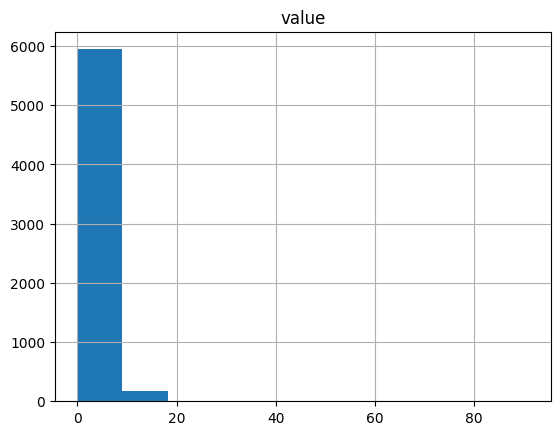

In [14]:
dataFrameWithZinc.hist('value')
dataFrameWithZinc['value'].describe()

In [15]:
dataFrameWithZincAndEdamer = dataFrameWithZinc.query('f_desc == \'Cheese, edam\'')
dataFrameWithZincAndEdamer.head()

,value,units,nu_desc,nu_group,id,f_desc,f_group,manufacturer
151,3.75,mg,"Zinc, Zn",Elements,1018,"Cheese, edam",Dairy and Egg Products,


In [16]:
# Hat Edamer einen überdurchschnittlichen Zinkgehalt?
dataFrameWithZincAndEdamer['value'].values[0] > dataFrameWithZinc['value'].mean()

True

In [17]:
# Haben mehr als 75% aller Nahrungsmittel einen kleineren Zinkgehalt?
zincAndEdamerValue = dataFrameWithZincAndEdamer['value'].values[0]
len(dataFrameWithZinc.query('value < @zincAndEdamerValue')) / len(dataFrameWithZinc)
# Ja, ca. 80% aller Nahrungsmittel haben einen kleineren Zinkgehalt.

0.8062571288903373